In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

In [2]:
# Load .env environment variables
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [5]:
# Format current date as ISO format
start_date = pd.Timestamp("2016-11-17", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-11-17", tz="America/New_York").isoformat()

In [6]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"
tickers = ["AMZN"]


In [7]:
# Get current price data for MSFT and AAPL
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_portfolio

AMZN                                        
                               open       high        low    close   volume
time                                                                       
2021-06-29 00:00:00-04:00  3440.000  3456.0300  3423.0300  3449.48  1696088
2021-06-30 00:00:00-04:00  3443.000  3471.6018  3435.0000  3440.29  1959873
2021-07-01 00:00:00-04:00  3436.000  3457.0000  3409.4207  3432.98  1801106
2021-07-02 00:00:00-04:00  3451.500  3511.7200  3436.9200  3510.99  2711182
2021-07-06 00:00:00-04:00  3530.110  3685.4800  3529.0000  3675.72  6394617
...                             ...        ...        ...      ...      ...
2021-11-11 00:00:00-05:00  3514.740  3543.2400  3467.4700  3472.46  2086143
2021-11-12 00:00:00-05:00  3488.890  3540.7263  3447.0500  3525.97  2316171
2021-11-15 00:00:00-05:00  3538.045  3593.8800  3525.8100  3545.69  2370404
2021-11-16 00:00:00-05:00  3539.000  3576.5000  3525.1465  3540.70  1878273
2021-11-17 00:00:00-05:00  3565.950  3587.2450  3545.3500  3548.86  2332560

[100 rows x 5 columns]

In [8]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices for all the tickers
for ticker in tickers:
    df_closing_prices[ticker] = df_portfolio[ticker]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head()

,AMZN
2021-06-29,3449.48
2021-06-30,3440.29
2021-07-01,3432.98
2021-07-02,3510.99
2021-07-06,3675.72


In [9]:
# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.head()

,AMZN
2021-06-30,-0.002664
2021-07-01,-0.002125
2021-07-02,0.022724
2021-07-06,0.046918
2021-07-07,0.006195


<AxesSubplot:ylabel='Frequency'>

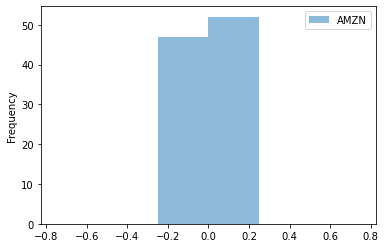

In [10]:
# Visualize the distribution of daily returns across all stocks using a histogram plot
# Hint: To make the plot easier to read, set the alpha arguement to 0.5
df_daily_returns.plot.hist(alpha=0.5,bins=[-0.75,-0.5,-0.25,0,0.25,0.5,0.75])

<AxesSubplot:ylabel='Frequency'>

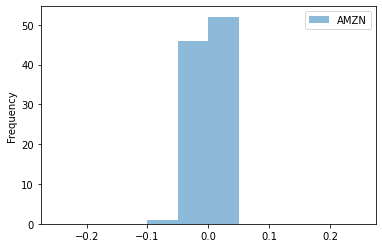

In [11]:
df_daily_returns.plot.hist(alpha=0.5,bins=[-0.25,-0.20,-0.15,-0.10,-0.05,0,0.05,0.10,0.15,0.20,0.25])

<AxesSubplot:ylabel='Density'>

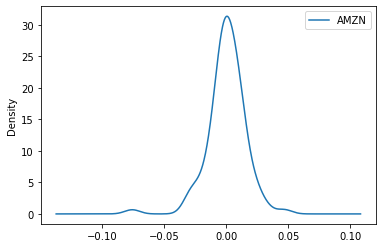

In [12]:
# Visualize the distribution of daily returns across all stocks using a density plot
df_daily_returns.plot.density()